<a href="https://colab.research.google.com/github/Valentina3147/ValentinaLopez/blob/main/clases/LSTMClase14092024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [26]:
datatrain = pd.read_csv('DailyDelhiClimateTrain.csv')
datatest = pd.read_csv('DailyDelhiClimateTest.csv')
datatrain.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [27]:
  #formatea columna fecha con el formato
datatrain["date"] = pd.to_datetime(datatrain["date"],format='%Y-%m-%d')
datatest["date"] = pd.to_datetime(datatest["date"],format='%Y-%m-%d')
datatrain.head(2)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.0,84.5,0.00,1015.666667
1,2013-01-02,7.4,92.0,2.98,1017.800000


In [28]:
#se va a indesar por fecha
datatrain.set_index("date",inplace=True)
datatest.set_index("date",inplace=True)
datatrain.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [29]:
datatrain.count()

,0
meantemp,1462
humidity,1462
wind_speed,1462
meanpressure,1462


In [30]:
datatrain.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [32]:
datatrain.isnull().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


<Axes: xlabel='date'>

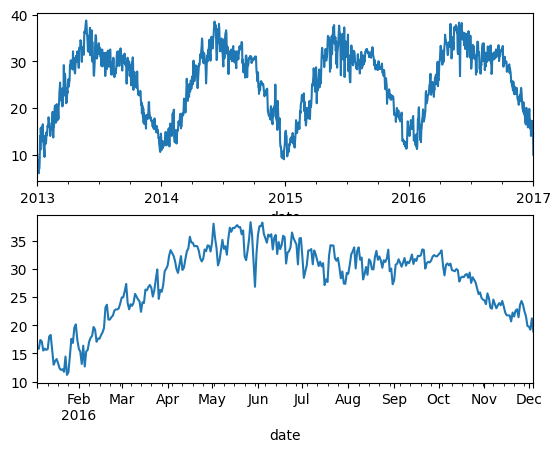

In [33]:
plt.subplot(2,1,1)
datatrain.meantemp.plot(style='-')
plt.subplot(2,1,2)
datatrain['2016-01-04':'2016-12-04'].meantemp.plot(style='-')

<Axes: xlabel='date'>

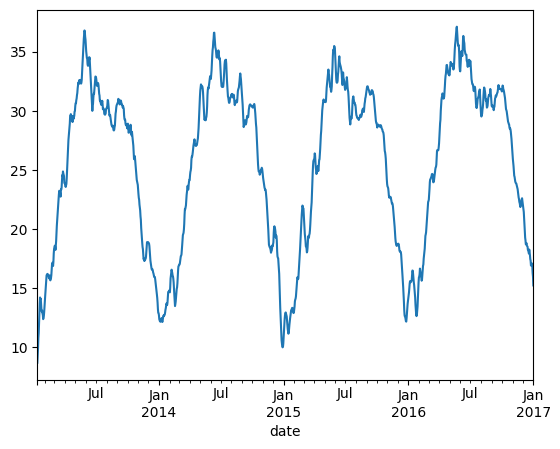

In [34]:
#toma los diez primeros datos y los promedia y de ahi sale el primer dato
datatrain = datatrain.rolling(10).mean().dropna()
datatest = datatest.rolling(10).mean().dropna()

datatrain.meantemp.plot(style='-')

In [35]:
datatrain.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-10,8.709048,76.003095,4.736952,1017.518095
2013-01-11,9.280476,72.681667,5.794095,1017.565714
2013-01-12,9.940476,70.881667,6.818952,1017.342857
2013-01-13,10.807143,69.698333,6.818952,1016.809524
2013-01-14,11.223810,71.381667,6.757286,1016.609524


In [36]:
data_aux=datatrain.resample('M').mean()
data_aux.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-31,12.437906,72.773777,5.439949,1017.826542
2013-02-28,16.167691,71.777538,6.479151,1016.206229
2013-03-31,22.192124,58.575687,8.994887,1012.829370
2013-04-30,27.715107,38.200317,8.030352,1006.697663
2013-05-31,33.181156,29.522116,8.926276,1001.007147


In [37]:
#eliminar columnas

datatrain=datatrain.drop(labels=['humidity','wind_speed','meanpressure'],axis=1)
datatest=datatest.drop(labels=['humidity','wind_speed','meanpressure'],axis=1)

datatrain.head()

,meantemp
date,
2013-01-10,8.709048
2013-01-11,9.280476
2013-01-12,9.940476
2013-01-13,10.807143
2013-01-14,11.223810


In [38]:
#escalar los datos para mapear en un rango

scalar=MinMaxScaler(feature_range=(-1,1))
datatrain_arr=scalar.fit_transform(datatrain)
datatest_arr=scalar.fit_transform(datatest)

datatrain_arr

array([[-1.        ],
       [-0.95978528],
       [-0.91333728],
       ...,
       [-0.4675581 ],
       [-0.48865231],
       [-0.53992608]])

In [43]:
# prediccion del valor siguiente

steps =20
xtrain = []
ytrain = []

for i in range(len(datatrain_arr)-steps):
    xtrain.append(datatrain_arr[i:i+steps])
    ytrain.append(datatrain_arr[i+steps])


steps =20
xtest = []
ytest = []

for i in range(len(datatest_arr)-steps):
    xtest.append(datatest_arr[i:i+steps])
    ytest.append(datatest_arr[i+steps])

In [45]:
xtrain = np.asanyarray(xtrain)
ytrain = np.asanyarray(ytrain)

xtest = np.asanyarray(xtest)
ytest = np.asanyarray(ytest)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(1433, 20, 1) (1433, 1) (85, 20, 1) (85, 1)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout


model = Sequential()
model.add(LSTM(units=256,return_sequences=True,activation='relu',input_shape=(20,1)))

#dropout elimina neuronas al azar
model.add(Dropout(0.2))


model.add(LSTM(units=128,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=32,return_sequences=False,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 20, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,681 (2.04 MB)

 Trainable params: 535,681 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',loss='mse')

In [49]:
#entrenamiento


history=model.fit(xtrain,ytrain,epochs=10,validation_split=0.1,batch_size=32,verbose=1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - loss: 0.1578 - val_loss: 0.0085
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0323 - val_loss: 0.0198
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0278 - val_loss: 0.0061
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0197 - val_loss: 0.0105
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0203 - val_loss: 0.0035
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0197 - val_loss: 0.0028
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0155 - val_loss: 0.0048
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0143 - val_loss: 0.0030
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0143 - val_loss: 0.0063
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0142 - val_loss: 0.0026


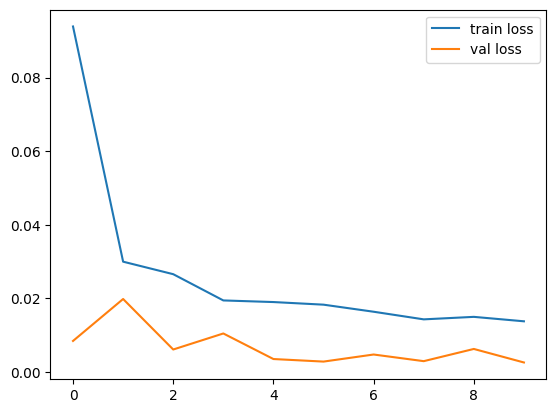

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])
plt.show()

In [51]:
model.save('mi_forescasting.h5')

In [52]:
ypred=model.predict(xtest)
ypred=scalar.inverse_transform(ypred)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 814ms/step


In [53]:
ypred

array([[16.828487],
       [17.137989],
       [17.333958],
       [17.417711],
       [17.401722],
       [17.305075],
       [17.142939],
       [16.941185],
       [16.724176],
       [16.514574],
       [16.346151],
       [16.228497],
       [16.175264],
       [16.182236],
       [16.203543],
       [16.213158],
       [16.194536],
       [16.145842],
       [16.095255],
       [16.09513 ],
       [16.201136],
       [16.47087 ],
       [16.944838],
       [17.623999],
       [18.438738],
       [19.294952],
       [20.066072],
       [20.678335],
       [21.071   ],
       [21.222563],
       [21.18961 ],
       [21.056   ],
       [20.881325],
       [20.702265],
       [20.550114],
       [20.441664],
       [20.389769],
       [20.406628],
       [20.496689],
       [20.659101],
       [20.857513],
       [20.998026],
       [21.002653],
       [20.864243],
       [20.615875],
       [20.297588],
       [19.939957],
       [19.582224],
       [19.292171],
       [19.15127 ],


In [54]:
ytest=scalar.inverse_transform(ytest)

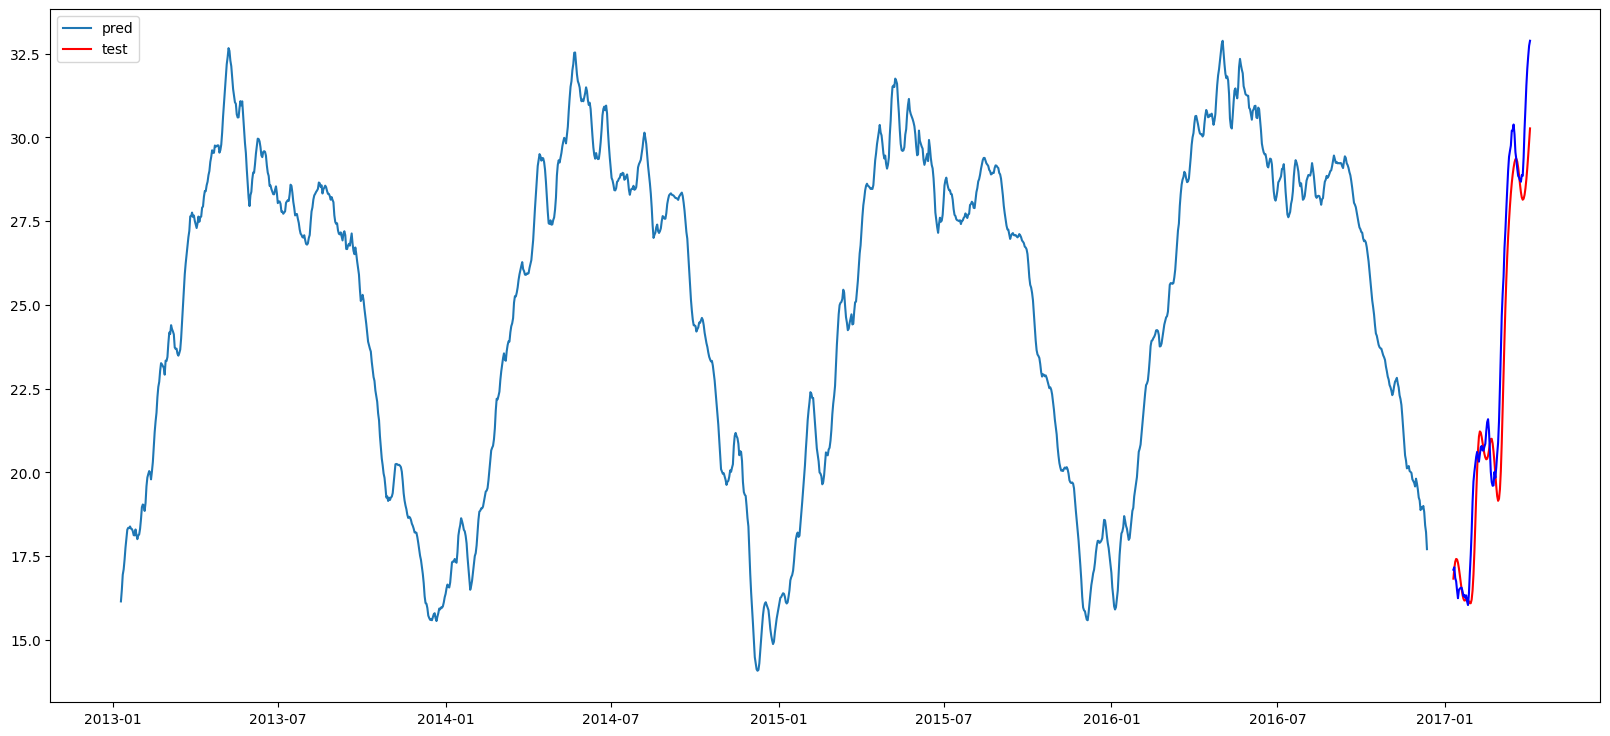

In [56]:
plt.figure(figsize=(20,9))
plt.plot(datatrain.index[:-steps],scalar.inverse_transform(ytrain))
plt.plot(datatest.index[:-steps],ypred,'r')
plt.plot(datatest.index[:-steps],ytest,'b')

plt.legend(['pred','test'])
plt.show()

In [61]:
#metrica de error de nuestra red

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

mean_squared_error(ytest,ypred)


2.4179201228934293

In [62]:
mean_absolute_percentage_error(ytest,ypred)

0.04898621007548512